<a href="https://colab.research.google.com/github/yangjik/yang.study/blob/main/06_%EB%8B%A4%EC%A4%91%ED%9A%8C%EA%B7%80%2C_%ED%8A%B9%EC%84%B1_%EA%B3%B5%ED%95%99%2C_%EB%A6%BF%EC%A7%80%2C_%EB%9D%BC%EC%8F%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>다중 회귀</h3>

- 여러 개의 특성을 사용하여 선형 회귀를 수행하는 것이다.
-

In [ ]:
# 사전데이터 준비 - 웹사이트 통해서 가져오기
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
# 사전데이터 준비 - numpy 통해서 직접 입력
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
# train, test 데이터로 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [ ]:
# 특성을 만들거가 전처리 하귀 위한 사이킷런의 변환기 - PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]])                  # 2개의 특성2, 3 으로 이루어진 셈플적용
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False)   # 사이킷런의 선형 모델은 자동으로 절편을 추가하므로 사용안해도된다.
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [ ]:
# train_input 데이터 변환
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly.shape

(42, 9)

In [ ]:
# 특성확인하기
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2']<br>
x0는 첫번째 특성을 의미, x0^2 첫번째 특성의 제곱, x0 x1은 첫번쨰 특성과 두번째 특성의 곱을 나타내는 식.

In [ ]:
# 변환된 특성만들기
test_poly = poly.transform(test_input)

In [ ]:
# 다중 회귀 모델 훈련하기
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [ ]:
lr.score(test_poly, test_target)

#  ↓ 결과는 과소적합 문제는 더이상 발생 안함.

0.9714559911594111

In [ ]:
# 특성을 추가하기.
# PolynomialFeatures 클래스의 degree 매개변수를 사용하여 필요한 고차항의 최대 차수를 지정
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

(42, 55)


In [ ]:
# train_poly의 특성 개수 : 55개
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [ ]:
print(lr.score(test_poly, test_target))

-144.40579436844948


위에 결과를 확인하면 train_poly로 했을땐 완벽했지만<br>
test_poly 정확률을 보면 음수가 나왔다... <br>
즉. 과대적합으로 되었다는 것이다.

<br>

<h3>규제</h3>

- 모델이 훈련 세트에 과대적합되지 않도록 만드는 것이다.
- 선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일이다.


In [ ]:
# sklearn에서 제공하는 StandardScaler 사용 -> 표준점수로 변환
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()                           # 객체 생성
ss.fit(train_poly)

# 꼭 train 데이터 변환시 test 데이터도 변환하기!!!!
train_scaled = ss.transform(train_poly)         # train 데이터 변환
test_scaled = ss.transform(test_poly)           # test 데이터 변환

In [ ]:
ss.mean_.shape    # 평균개수 확인

(55,)

<h3>릿지 회귀</h3>

- 계수를 제곱한 값을 기준으로 규제를 적용한다.
<br><br>

In [ ]:
# 릿지 모델로 학습후 정확률
from sklearn.linear_model import Ridge
ridge = Ridge()                         # 객체 생성
ridge.fit(train_scaled, train_target)   # train 데이터 학습
ridge.score(train_scaled, train_target) # train 정확률

0.9896101671037343

In [ ]:
# test 데이터 정확률
ridge.score(test_scaled, test_target)   # test 정확률

0.9790693977615387

너무 과대적합 발생은 안생김.<br>
규제의 양을 임의로 조절가능.<br>
모델 객체생성시 alpha 값을 조절해서 규제 강도 조절가능. <br>alpha값이 크면 규제 강도 크고, 값이 작으면 규제 강도는 작다.<br>
alpha <= 하이퍼파라미터이므로 사람이 직접 조절해주는 것이다.<br><br>

<h3>적절한 alpha 값 찾기.</h3>

- alpha 값에 대한 결정계수 값의 그래프를 그려보기.

In [ ]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 릿지 모델 만들기
  ridge = Ridge(alpha=alpha)
  # 릿지 모델을 훈련
  ridge.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))


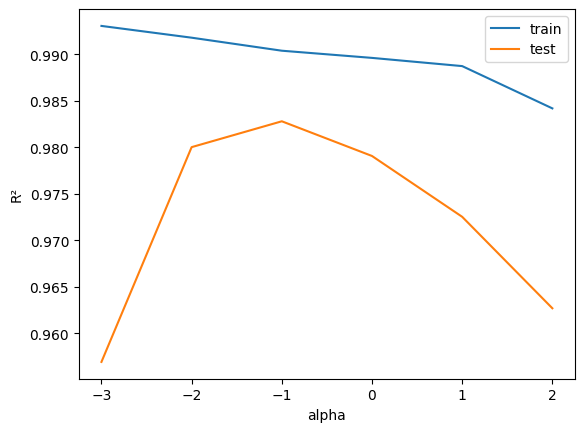

In [ ]:
# numpy 에서 np.log() / np.log10() 이렇게 두가지가 있다.
plt.plot(np.log10(alpha_list), train_score, label='train')
plt.plot(np.log10(alpha_list), test_score, label='test')
plt.xlabel('alpha')
plt.ylabel('R²')
plt.legend()
plt.show()

In [ ]:
# 그래프에서 동시에 값이 떨어지는 위치는 -1이므로 알파 값을 0.1로 둔다.
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))
# 결과는 과대적합 과소적합 균형을 맞추고있다.

0.9903815817570367
0.9827976465386928


<br><br>


<h3>라쏘 회귀</h3>

- 계수의 절댓값을 기준으로 규제를 적용한다.
- 계수의 크기를  0으로 만들 수도 있다.
<br><br>

In [ ]:
# Ridge 에서 Lasso 로 바꾸는 것이 전부이다.
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [ ]:
lasso.score(test_scaled, test_target)

0.9800593698421883

In [ ]:
# 규제
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 객체 생성
  lasso = Lasso(alpha = alpha, max_iter=10000)
  # 모델 학습
  lasso.fit(train_scaled, train_target)
  # 정확률 저장
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


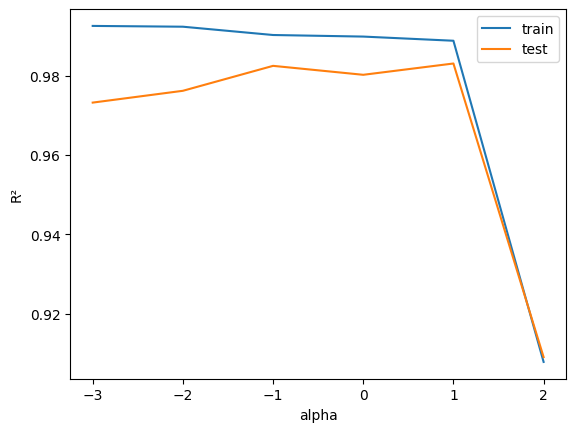

In [ ]:
plt.plot(np.log10(alpha_list), train_score, label='train')
plt.plot(np.log10(alpha_list), test_score, label='test')
plt.xlabel('alpha')
plt.ylabel('R²')
plt.legend()
plt.show()

위 그래프를 확인하면 동시에 데이터가 감소되는 위치 1 이 최적의 알파값이다.<br>
즉 10¹ 이므로 alpha는 10이다.

In [ ]:
# alpha 값 10 으로 모델 학습
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print('train : ',lasso.score(train_scaled, train_target))
print('test : ', lasso.score(test_scaled, test_target))


train :  0.9888067471131867
test :  0.9824470598706695


In [ ]:
# 라쏘 계수를  0으로 할 수있다. lasso.coef_속성에서 0만 추출

In [ ]:
np.sum(lasso.coef_ == 0)

40